In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor, kernels

plt.style.use('ggplot')

In [2]:
def target(x):
    return x*np.sin(x)
  
def new_target(x):
    return 100*x*np.sin(x)

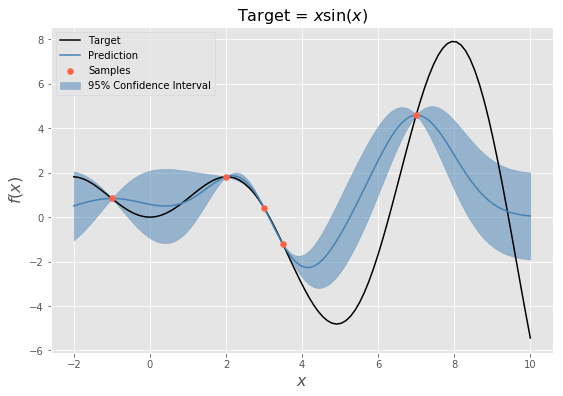

In [3]:
x_sample = np.array([-1, 2, 3, 3.5, 7]).reshape(-1,1)
y_sample = target(x_sample)

gp = GaussianProcessRegressor().fit(x_sample, y_sample)

x_all = np.linspace(-2,10,100).reshape(-1,1)
mu, std = gp.predict(x_all, return_std=True)

plt.figure(figsize=(9,6))
plt.plot(x_all.ravel(), target(x_all).ravel(), color='black', label='Target')
plt.scatter(x_sample.ravel(), y_sample.ravel(), color='tomato', label='Samples', zorder=20)
plt.plot(x_all.ravel(), mu.ravel(), color='steelblue', label='Prediction')
plt.fill_between(x_all.ravel(), mu.ravel()-1.96*std, mu.ravel()+1.96*std, color='steelblue', alpha=0.5, label='95% Confidence Interval')
plt.legend(loc='best')
plt.title('Target = $x\sin(x)$', fontsize=16)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$f(x)$', fontsize=16)
plt.show()

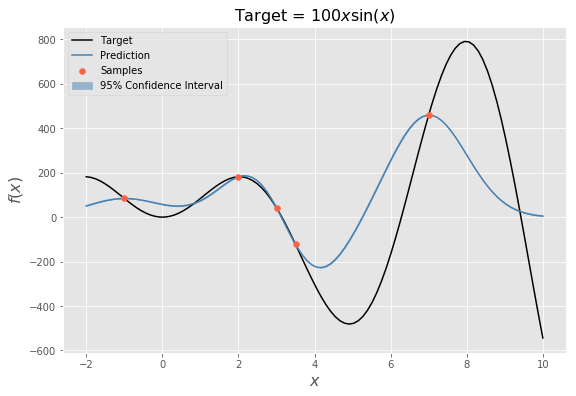

In [4]:
x_sample = np.array([-1, 2, 3, 3.5, 7]).reshape(-1,1)
y_sample = new_target(x_sample)

gp = GaussianProcessRegressor().fit(x_sample, y_sample)

x_all = np.linspace(-2,10,100).reshape(-1,1)
mu, std = gp.predict(x_all, return_std=True)

plt.figure(figsize=(9,6))
plt.plot(x_all.ravel(), new_target(x_all).ravel(), color='black', label='Target')
plt.scatter(x_sample.ravel(), y_sample.ravel(), color='tomato', label='Samples', zorder=20)
plt.plot(x_all.ravel(), mu.ravel(), color='steelblue', label='Prediction')
plt.fill_between(x_all.ravel(), mu.ravel()-1.96*std, mu.ravel()+1.96*std, color='steelblue', alpha=0.5, label='95% Confidence Interval')
plt.legend(loc='best')
plt.title('Target = $100x\sin(x)$', fontsize=16)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$f(x)$', fontsize=16)
plt.show()

Try fixing the length_scale_boundary of the RBF and increasing the amplitude through use of a ConstantKernel.

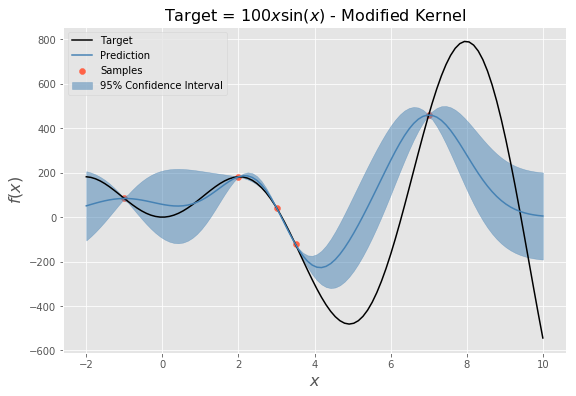

In [5]:
x_sample = np.array([-1, 2, 3, 3.5, 7]).reshape(-1,1)
y_sample = new_target(x_sample)

gp = GaussianProcessRegressor(kernel=kernels.ConstantKernel(10000.0, constant_value_bounds='fixed')*kernels.RBF(1, length_scale_bounds='fixed'))
gp.fit(x_sample, y_sample)

x_all = np.linspace(-2,10,100).reshape(-1,1)
mu, std = gp.predict(x_all, return_std=True)

plt.figure(figsize=(9,6))
plt.plot(x_all.ravel(), new_target(x_all).ravel(), color='black', label='Target')
plt.scatter(x_sample.ravel(), y_sample.ravel(), color='tomato', label='Samples')
plt.plot(x_all.ravel(), mu.ravel(), color='steelblue', label='Prediction')
plt.fill_between(x_all.ravel(), mu.ravel()-1.96*std, mu.ravel()+1.96*std, color='steelblue', alpha=0.5, label='95% Confidence Interval')
plt.legend(loc='best')
plt.title('Target = $100x\sin(x)$ - Modified Kernel', fontsize=16)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$f(x)$', fontsize=16)
plt.show()

Now try scaling the target before fitting.

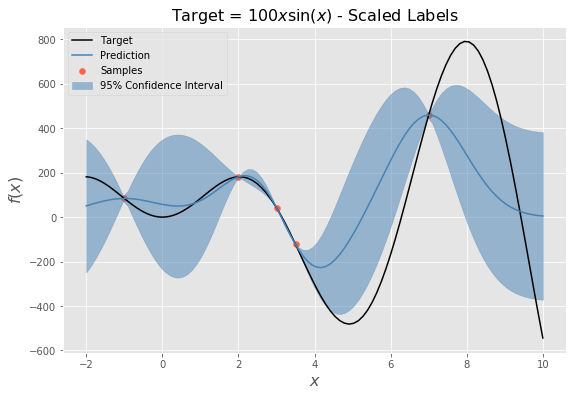

In [6]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler(with_std=True, with_mean=False)

x_sample = np.array([-1, 2, 3, 3.5, 7]).reshape(-1,1)
y_sample = scl.fit_transform(new_target(x_sample))

gp = GaussianProcessRegressor()
gp.fit(x_sample, y_sample)

x_all = np.linspace(-2,10,100).reshape(-1,1)
mu, std = gp.predict(x_all, return_std=True)
mu = scl.inverse_transform(mu)
std = scl.inverse_transform(std.reshape(-1,1)).ravel()

plt.figure(figsize=(9,6))
plt.plot(x_all.ravel(), new_target(x_all).ravel(), color='black', label='Target')
plt.scatter(x_sample.ravel(), scl.inverse_transform(y_sample), color='tomato', label='Samples')
plt.plot(x_all.ravel(), mu.ravel(), color='steelblue', label='Prediction')
plt.fill_between(x_all.ravel(), mu.ravel()-1.96*std, mu.ravel()+1.96*std, color='steelblue', alpha=0.5, label='95% Confidence Interval')
plt.legend(loc='best')
plt.title('Target = $100x\sin(x)$ - Scaled Labels', fontsize=16)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$f(x)$', fontsize=16)
plt.show()